In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing Dataset
dna = pd.read_csv("DataDNA.csv")

### Q 2: Part 1

In [3]:
# Calculating zscore
from scipy import stats
DNA_zscore = stats.zscore(dna)

#### The goal of normalization is to make every datapoint have the same scale so each feature is equally important. Min-max normalization guarantees all features will have the exact same scale but does not handle outliers well. Whereas, z-score normalization: Handles outliers, but does not produce normalized data with the exact same scale.
#### By random sampling you will achieve independence and also a smooth generation of samples without any bias of the dataset. There are no previous testing to see if the set is unbalanced or not, if there are correlations within samples, etc.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113152518>]],
      dtype=object)

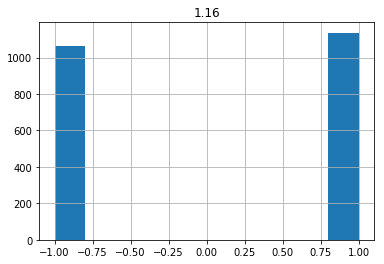

In [4]:
#Distribution of classes
dna.hist(column="1.16")

In [5]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
DNA_zscore = (dna.iloc[:, 0:-1] - dna.iloc[:, 0:-1].mean())/dna.iloc[:, 0:-1].std()
#train, test = train_test_split(DNA_zscore, test_size=0.2)
X = DNA_zscore.iloc[:,:].values
y = dna.iloc[:, -1].values 

### Q2: Part 2 (a)

#### We are doing cross validation on training set and evaluating KNN to make sure our model is more generalizable and hasn't just learned the data. Our result from the test data is our model's performance on 'general' data. Replicating this process would remove the independence of the datasets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.metrics import roc_curve, auc

# creating odd list of K for KNN
lst = list(range(1,32)) # [1,2,3,4,5,6,7,8,9,10]
mlist = [num for num in lst if num % 2 == 1]

def figure_plot(acc,count):
    fig = plt.figure(figsize = (13,7))
    plt.bar(mlist , acc)
    plt.xlabel('Neighbours', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.title('Neighbours VS Accuracy')
    plt.savefig("Accuracy VS neighbours for KNN- fold "+str(count))
    plt.close()

# empty list that will hold cv scores
cv_scores = []
count = 0

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X_train)

for train_index, test_index in kf.split(X_train):
    X_1, X_2 = X_train[train_index], X_train[test_index]
    y_1, y_2 = y_train[train_index], y_train[test_index]
#   perform 5-fold cross validation
    acc = []
    count+=1
    for k in mlist:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_1, y_1)
        y_predict = knn.predict(X_2)
        acc.append(metrics.accuracy_score(y_2,y_predict))
        pr = knn.predict_proba(X_2)
        pred = pr[:,1]
        ft, tp, th = metrics.roc_curve(y_2, pred)
        roc_auc = metrics.auc(ft,tp)
    figure_plot(acc,count)

The optimal number of neighbors is 21


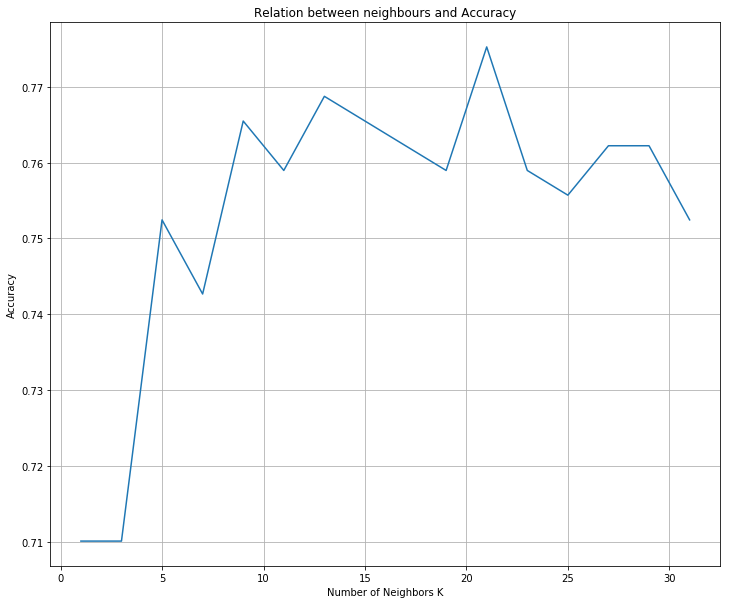

In [8]:
optimal_k = mlist[acc.index(max(acc))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.figure(figsize=(12,10))
plt.plot(mlist, acc, label='Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title("Relation between neighbours and Accuracy")
plt.grid(True)
plt.show()

In [9]:
# Implementation of SVM
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svm = svm.SVC()

parameters = {'kernel': ['rbf'],
              'C' : [0.1, 0.5, 1, 2, 5, 10, 20, 50],
              'gamma' : [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
             }
svm_clf = GridSearchCV(svm, parameters, cv=5)

svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50], 'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Best Parameters

In [10]:
print('SVM best param: ', svm_clf.best_params_)

SVM best param:  {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}


In [11]:
y_pred = svm_clf.predict(X_test)
# Accuracy calculation
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy on SVM model =', accuracy)

Accuracy on SVM model = 0.906060606060606


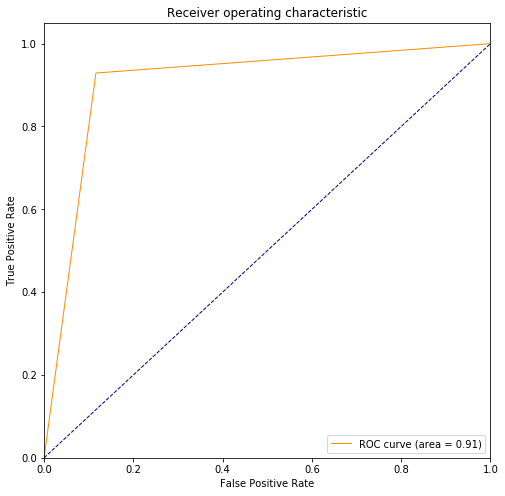

In [12]:
# Plotting ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(svm_clf.predict(X_test), y_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Q 3: part (a)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss

#KNN
neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(X_test, y_test)
y_pred_knn = neigh.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy for KNN: {:.4%}".format(acc_knn))

#SVC
clf = SVC(C=5, gamma=0.01, kernel = 'rbf')
clf.fit(X_test, y_test)
y_pred_svm = clf.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_knn)
print("Accuracy for SVC: {:.4%}".format(acc_svc))


#Random Forest
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_test, y_test)
y_pred_rfc = rfc.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rfc)
print("Accuracy for RF: {:.4%}".format(acc_rf))


#MLP
mlpc = MLPClassifier()
mlpc.fit(X_test, y_test)
y_pred_mlp = mlpc.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy for MLP: {:.4%}".format(acc_mlp))

Accuracy for KNN: 75.1515%
Accuracy for SVC: 75.1515%
Accuracy for RF: 99.8485%
Accuracy for MLP: 100.0000%


/Users/s.n.azim/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Q3 : part (b)

In [14]:
#Random Forest
rfc_exp = RandomForestClassifier(n_estimators=100, max_depth = 10)
rfc_exp.fit(X, y)
y_pred_rfc = rfc_exp.predict(X_test)
acc_rfc_exp = accuracy_score(y_test, y_pred_rfc)
print("Accuracy for RF_EXP: {:.4%}".format(acc_rfc_exp))


#MLP
mlpc_exp = MLPClassifier(hidden_layer_sizes = 100, solver='adam', max_iter = 100,activation = 'tanh')
mlpc_exp.fit(X, y)
y_pred_mlp = mlpc_exp.predict(X_test)
acc_mlp_exp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy for MLP_EXP: {:.4%}".format(acc_mlp_exp))

# with solver sgd accuracy decreases (max accuracy with adam,lbfgs)
# increase in max_depth increases the accuracy
# activation logistic,identity accuracy decreases (max accuracy with tanh)

Accuracy for RF_EXP: 100.0000%
Accuracy for MLP_EXP: 100.0000%


/Users/s.n.azim/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### Increase in max_depth increases the accuracy for Random Forest Classifier. 
#### For MLP, maximum accuracy is obtained with solvers : adam and lbfgs and accuracy decreses with solver adam.
#### With activation parameter, maximum accuracy is obtained with tanh, accuracy decreses with logistic and identity activation functions.

### Part 3 (c)

In [15]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from random import *
import time

#KNN
knn = KNeighborsClassifier(n_neighbors=7)

acc_knn = list()
pre_knn = list()
recall_knn = list()
fbeta_knn = list()
training_time = list()
clf_time = list()
ratio = [0.4,0.5,0.6,0.7]
for j in ratio:
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j)
    
        t0=time.time()
        knn.fit(X_train, y_train)
        training_time.append(round(time.time()-t0, 3))
    
        t1=time.time()
        y_pred = knn.predict(X_test)
        clf_time.append(round(time.time()-t1, 3))
    
        acc_knn.append(metrics.accuracy_score(y_test,y_pred))
        pre_knn.append(precision_score(y_test,y_pred))
        recall_knn.append(recall_score(y_test,y_pred))
        fbeta_knn.append(fbeta_score(y_test,y_pred, beta=0.5))
    
col={'Accuracy': acc_knn, 'Precision': pre_knn, 'Recall': recall_knn, 'F-Measure': fbeta_knn, "Training time": training_time, "Classification time": clf_time}
df = pd.DataFrame(data=col)
mean = [df['Accuracy'].mean(), df['Precision'].mean(), df['Recall'].mean(), df['F-Measure'].mean()]
std = [df['Accuracy'].std(), df['Precision'].std(), df['Recall'].std(), df['F-Measure'].std()]
report = ['Accuracy', 'Precision', 'Recall', 'F-Measure']
cols = {'Results': report, 'Average': mean, 'Standard Deviation': std}
result = pd.DataFrame(data=cols)
result

,Results,Average,Standard Deviation
0,Accuracy,0.733525,0.021258
1,Precision,0.921111,0.022901
2,Recall,0.532427,0.050297
3,F-Measure,0.801632,0.018877


In [16]:
#SVC
clf = SVC(C=5, gamma=0.01, kernel = 'rbf')

acc_clf = list()
pre_clf = list()
recall_clf = list()
fbeta_clf = list()
training_time = list()
clf_time = list()
ratio = [0.4,0.5,0.6,0.7]
for j in ratio:
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j)
    
        t0=time.time()
        clf.fit(X_train, y_train)
        training_time.append(round(time.time()-t0, 3))
    
        t1=time.time()
        y_pred = clf.predict(X_test)
        clf_time.append(round(time.time()-t1, 3))
    
        acc_clf.append(metrics.accuracy_score(y_test,y_pred))
        pre_clf.append(precision_score(y_test,y_pred))
        recall_clf.append(recall_score(y_test,y_pred))
        fbeta_clf.append(fbeta_score(y_test,y_pred, beta=0.5))
    
col={'Accuracy': acc_clf, 'Precision': pre_clf, 'Recall': recall_clf, 'F-Measure': fbeta_clf, "Training time": training_time, "Classification time": clf_time}
df = pd.DataFrame(data=col)
mean = [df['Accuracy'].mean(), df['Precision'].mean(), df['Recall'].mean(), df['F-Measure'].mean()]
std = [df['Accuracy'].std(), df['Precision'].std(), df['Recall'].std(), df['F-Measure'].std()]
report = ['Accuracy', 'Precision', 'Recall', 'F-Measure']
cols = {'Results': report, 'Average': mean, 'Standard Deviation': std}
result = pd.DataFrame(data=cols)
result

,Results,Average,Standard Deviation
0,Accuracy,0.886157,0.011503
1,Precision,0.903572,0.017979
2,Recall,0.872283,0.016298
3,F-Measure,0.897017,0.014233


In [17]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=10)

acc_rfc = list()
pre_rfc = list()
recall_rfc = list()
fbeta_rfc = list()
training_time = list()
clf_time = list()
ratio = [0.4,0.5,0.6,0.7]
for j in ratio:
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j)
    
        t0=time.time()
        rfc.fit(X_train, y_train)
        training_time.append(round(time.time()-t0, 3))
    
        t1=time.time()
        y_pred = rfc.predict(X_test)
        clf_time.append(round(time.time()-t1, 3))
    
        acc_rfc.append(metrics.accuracy_score(y_test,y_pred))
        pre_rfc.append(precision_score(y_test,y_pred))
        recall_rfc.append(recall_score(y_test,y_pred))
        fbeta_rfc.append(fbeta_score(y_test,y_pred, beta=0.5))
    
col={'Accuracy': acc_rfc, 'Precision': pre_rfc, 'Recall': recall_rfc, 'F-Measure': fbeta_rfc, "Training time": training_time, "Classification time": clf_time}
df = pd.DataFrame(data=col)
mean = [df['Accuracy'].mean(), df['Precision'].mean(), df['Recall'].mean(), df['F-Measure'].mean()]
std = [df['Accuracy'].std(), df['Precision'].std(), df['Recall'].std(), df['F-Measure'].std()]
report = ['Accuracy', 'Precision', 'Recall', 'F-Measure']
cols = {'Results': report, 'Average': mean, 'Standard Deviation': std}
result = pd.DataFrame(data=cols)
result

,Results,Average,Standard Deviation
0,Accuracy,0.920057,0.014353
1,Precision,0.956621,0.013169
2,Recall,0.884979,0.021873
3,F-Measure,0.941283,0.012456


In [18]:
#MLP
mlpc = MLPClassifier()

acc_mlpc = list()
pre_mlpc = list()
recall_mlpc = list()
fbeta_mlpc = list()
training_time = list()
clf_time = list()
ratio = [0.4,0.5,0.6,0.7]
for j in ratio:
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j)
        
        t0=time.time()
        mlpc.fit(X_train, y_train)
        training_time.append(round(time.time()-t0, 3))
    
        t1=time.time()
        y_pred = mlpc.predict(X_test)
        clf_time.append(round(time.time()-t1, 3))
    
        acc_mlpc.append(metrics.accuracy_score(y_test,y_pred))
        pre_mlpc.append(precision_score(y_test,y_pred))
        recall_mlpc.append(recall_score(y_test,y_pred))
        fbeta_mlpc.append(fbeta_score(y_test,y_pred, beta=0.5))
    
col={'Accuracy': acc_mlpc, 'Precision': pre_mlpc, 'Recall': recall_mlpc, 'F-Measure': fbeta_mlpc, "Training time": training_time, "Classification time": clf_time}
df = pd.DataFrame(data=col)
mean = [df['Accuracy'].mean(), df['Precision'].mean(), df['Recall'].mean(), df['F-Measure'].mean()]
std = [df['Accuracy'].std(), df['Precision'].std(), df['Recall'].std(), df['F-Measure'].std()]
report = ['Accuracy', 'Precision', 'Recall', 'F-Measure']
cols = {'Results': report, 'Average': mean, 'Standard Deviation': std}
result = pd.DataFrame(data=cols)
result

/Users/s.n.azim/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/s.n.azim/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/s.n.azim/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/s.n.azim/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

,Results,Average,Standard Deviation
0,Accuracy,0.880262,0.014956
1,Precision,0.899927,0.018280
2,Recall,0.864536,0.018829
3,F-Measure,0.892528,0.016008


In [19]:
# Results for Improved Classifiers
#Random Forest
rfc_exp = RandomForestClassifier(n_estimators=100, max_depth = 10)

acc_rfc_exp = list()
pre_rfc_exp = list()
recall_rfc_exp = list()
fbeta_rfc_exp = list()
training_time = list()
clf_time = list()
ratio = [0.4,0.5,0.6,0.7]
for j in ratio:
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j)
    
        t0=time.time()
        rfc_exp.fit(X_train, y_train)
        training_time.append(round(time.time()-t0, 3))
    
        t1=time.time()
        y_pred = rfc_exp.predict(X_test)
        clf_time.append(round(time.time()-t1, 3))
    
        acc_rfc_exp.append(metrics.accuracy_score(y_test,y_pred))
        pre_rfc_exp.append(precision_score(y_test,y_pred))
        recall_rfc_exp.append(recall_score(y_test,y_pred))
        fbeta_rfc_exp.append(fbeta_score(y_test,y_pred, beta=0.5))
    
col={'Accuracy': acc_rfc_exp, 'Precision': pre_rfc_exp, 'Recall': recall_rfc_exp, 'F-Measure': fbeta_rfc_exp, "Training time": training_time, "Classification time": clf_time}
df = pd.DataFrame(data=col)
mean = [df['Accuracy'].mean(), df['Precision'].mean(), df['Recall'].mean(), df['F-Measure'].mean()]
std = [df['Accuracy'].std(), df['Precision'].std(), df['Recall'].std(), df['F-Measure'].std()]
report = ['Accuracy', 'Precision', 'Recall', 'F-Measure', 'Training Time', 'Classification Time']
cols = {'Results': report, 'Average': mean, 'Standard Deviation': std}
result = pd.DataFrame(data=cols)
result

ValueError: arrays must all be same length

In [ ]:
# Results for Improved Classifiers
# MLP
mlpc_exp = MLPClassifier(hidden_layer_sizes = 100, solver='adam', max_iter = 100,activation = 'tanh')

acc_mlpc_exp = list()
pre_mlpc_exp = list()
recall_mlpc_exp = list()
fbeta_mlpc_exp = list()
training_time = list()
clf_time = list()
ratio = [0.4,0.5,0.6,0.7]
for j in ratio:
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j)
    
        t0=time.time()
        mlpc_exp.fit(X_train, y_train)
        training_time.append(round(time.time()-t0, 3))
    
        t1=time.time()
        y_pred = mlpc_exp.predict(X_test)
        clf_time.append(round(time.time()-t1, 3))
    
        acc_mlpc_exp.append(metrics.accuracy_score(y_test,y_pred))
        pre_mlpc_exp.append(precision_score(y_test,y_pred))
        recall_mlpc_exp.append(recall_score(y_test,y_pred))
        fbeta_mlpc_exp.append(fbeta_score(y_test,y_pred, beta=0.5))
    
col={'Accuracy': acc_mlpc_exp, 'Precision': pre_mlpc_exp, 'Recall': recall_mlpc_exp, 'F-Measure': fbeta_mlpc_exp, "Training time": training_time, "Classification time": clf_time}
df = pd.DataFrame(data=col)
mean = [df['Accuracy'].mean(), df['Precision'].mean(), df['Recall'].mean(), df['F-Measure'].mean()]
std = [df['Accuracy'].std(), df['Precision'].std(), df['Recall'].std(), df['F-Measure'].std()]
report = ['Accuracy', 'Precision', 'Recall', 'F-Measure']
cols = {'Results': report, 'Average': mean, 'Standard Deviation': std}
result = pd.DataFrame(data=cols)
result

#### N-fold validation are often used to get an estimate of your expected error. A problem in using n-fold validation is that the n repetitions are not independent of one another, the data used for training are also used for testing at other times, meaning that the estimator is biased. Making multiple n-fold cross validation may lower this bias and give a better estimate in terms of statistics. That's why classification was repeated 20 times.

### Part 4

### KNN
#### Benefits: Robust to noisy training data, effective if the training data is large.
#### Weakness: Computation cost is quite high because we need to compute distance of each query instance to all training samples.

### SVM
#### Benefits: fairly robust against overfitting, especially in high-dimensional space.
#### Weakness: Memory intensive and don't scale well to larger datasets.
    
### Random Forest    
#### Benefits: fairly robust to outliers
#### Weaknesses: Unconstrained, individual trees are prone to overfitting because they can keep branching until they memorize the training data.
    
### Multi Layer Perceptron
#### Benefits: Fault tolerance or graceful degradation and generalization.
#### Weakness: Large number of iterations are required for learning and occassional failure to settle to global minima.

### This is how analysis helps make a right choice:

#### Accuracy is the fraction of predictions our model got right. Accuracy alone doesn’t tell the full story when you’re working with a dispersed data set, where there is a significant difference between the number of positive and negative labels. Precision and Recall are proved to be better metrics for evaluating dispersed dataset problems. 
#### Precision is the ability of a classifier to calculate the fraction of how much we predicted correctly out of all the classes. 
#### Recall is the ability of the classifier to calculate the fraction of how much we predicted correctly out of all the positive classes.
#### It is often convenient to combine precision and recall into a single metric called the F1 score, in particular, if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall. The regular mean treats all values equally, the harmonic mean gives much more weight to low values thereby punishing the extreme values more. As a result, the classifier will only get a high F1 score if both recall and precision are high.

In [ ]:
import seaborn as sns
sample = pd.DataFrame(X)
plt.figure(figsize=(50, 50))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap='YlGnBu', annot=True)

#### Feature 28 and 27 has highest correlation which is 0.22, so we can choose either of the feature to be removed.